## Reading and cleaning the data

oThe first thing to do is to read the files that contain the data. In this section (first cells) the files are read and then they are clenaed in a way that they will contain just the rows that are of interest, that is, the ones that are present in the 4 datasets that will be manipulated, corresponding to 4 different years: 2003,2008,2013,2018). Also some columns and rows are renamed in order to set up the same names exactly for the different datasets.

In [38]:
import os

os.getcwd() 

'C:\\Users\\giovanni\\LlenguaCatalana\\Scripts\\Guifre'

In [55]:

data_dir = '../../Dades/Guifre/'
figures_dir = '../../Figures/Guifre/'

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file into a DataFrame
df2003 = pd.read_csv(data_dir + 'ambits_2003.csv',delimiter=";",index_col="Unnamed: 0")
df2008 = pd.read_csv(data_dir + 'ambits_2008.csv',delimiter=";",index_col="Unnamed: 0")
df2013 = pd.read_csv(data_dir + 'ambits_2013.csv',delimiter=";",index_col="Unnamed: 0")
df2018= pd.read_csv(data_dir + 'ambits_2018.csv',delimiter=";",index_col="Unnamed: 0")


In [57]:
print("Data Overview:")
df2003


Data Overview:


,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions,Total
Membres de la llar (1),34,"6,6","8,7","10,3","36,5","3,9",100
Amistats,"22,4","16,6","17,8","12,4","27,9","2,9",100
Veïns,"27,3","10,2","16,9","8,6","35,4","1,6",100
Companys d'estudi (2),"26,2","17,1","19,8","11,1","20,7","5,1",100
Companys de feina (3),"25,6","14,9","20,3","10,6","24,7","3,8",100
Petit comerç,"32,8","14,5","15,5","8,3","28,6","0,3",100
Gran comerç,30,"12,7",14,10,"31,8","1,5",100
Entitats financeres,"45,7","8,1",9,"4,7","30,9","1,7",100
Personal mèdic,"38,1","9,1","11,4",5,"35,7","0,8",100
Escriure notes personals,"28,6","3,6","6,1","4,1","53,8","3,8",100


In [58]:
#Clean dataset df2003
df2003.drop('Total', axis=1, inplace=True) #Delete the last column
df2003 = df2003.drop('Escriure notes personals') #Delete a row

In [59]:
#Clean dataset df2018
df2018 = df2018.rename(columns={'Català i castellà': 'Ambdues'})         #Rename some columns
df2018 = df2018.rename(columns={'Altres llengües': 'Altres situacions'})
df2018 = df2018.drop('Usuaris o clients de Catalunya (4)')               #Delete some rows
df2018 = df2018.drop('Administració local')
df2018 = df2018.drop('Administració de la Generalitat de Catalunya')
df2018 = df2018.drop("Administració de l'Estat")
df2018 = df2018.drop('Escriure notes personals')
df2018 = df2018.drop('Escriure missatges de mòbil')



In [60]:
#Clean dataset df2008

df2008 = df2008.drop('Escriure notes personals')
df2008 = df2008.rename(columns={'Català i castellà': 'Ambdues'})
df2008 = df2008.rename(columns={'Altres llengües': 'Altres situacions'})

In [61]:
#Clean dataset df2013
df2013 = df2013.rename(columns={'Català i castellà': 'Ambdues'})
df2013 = df2013.rename(columns={'Altres llengües': 'Altres situacions'})
df2013 = df2013.drop('Usuaris o clients de Catalunya (4)') 
df2013 = df2013.drop('Administració local')
df2013 = df2013.drop('Administració de la Generalitat de Catalunya')
df2013 = df2013.drop("Administració de l'Estat")
df2013 = df2013.drop('Escriure notes personals')
df2013 = df2013.drop('Escriure missatges de mòbil')




In [62]:
def rename_rows(df):
    '''Function that renames some particular rows changing the for simplicity'''

    df = df.copy()  # Work on a copy to avoid modifying the original dataframe
    
    df = df.rename(index={'Membres de la llar (1)':'Família'})     #Renames the specific rows for a given name
    df = df.rename(index={"Companys d'estudi (2)":"Companys d'estudi"})
    df = df.rename(index={"Companys de feina (3)":"Companys de feina"})
    
    return df


#Apply the function to all the dataframes
df2003=rename_rows(df2003)
df2008=rename_rows(df2008)
df2013=rename_rows(df2013)
df2018=rename_rows(df2018)


In [63]:
df2018

,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions
Família,"27,2","5,6","7,8","10,1","37,7","11,6"
Amistats,"13,4","16,5","18,3","13,1","28,9","9,8"
Veïns,"16,8","14,3","17,1","10,9",37,"3,8"
Companys d'estudi,"18,2","18,1","19,1","12,9","19,9","11,7"
Companys de feina,"15,3","15,1","20,2","13,2",26,"10,3"
Petit comerç,"19,9",18,"18,2",10,"32,2","1,8"
Gran comerç,"17,1","15,9","18,7","11,9","34,3","2,2"
Entitats financeres,"30,1","11,6","12,4",7,"34,8","4,2"
Personal mèdic,"26,4","12,6","14,5","6,8","38,4","1,4"


In [64]:
def clean_dataframe(df, columns_to_convert):
    """
    Cleans the specified columns of a dataframe by:
    - Converting them to strings.
    - Replacing commas with dots.
    - Converting them to numeric, coercing errors.

    Parameters:
        df (pd.DataFrame): The dataframe to clean.
        columns_to_convert (list): List of column names to process.

    Returns:
        pd.DataFrame: The cleaned dataframe.
    """
    df = df.copy()  # Work on a copy to avoid modifying the original dataframe
    
    # Convert columns to strings
    df = df.astype({col: str for col in columns_to_convert})
    
    # Process each column
    for col in columns_to_convert:
        df[col] = df[col].apply(lambda x: x.replace(',', '.'))
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df


column_names= ['Només català',
                    'Més català que castellà',
                    'Ambdues',
                    'Més castellà que català',
                    'Només castellà',
                    'Altres situacions']

df2003 = clean_dataframe(df2003, column_names)
df2008 = clean_dataframe(df2008, column_names)
df2013 = clean_dataframe(df2013, column_names)
df2018 = clean_dataframe(df2018, column_names)

In [65]:
#Print a df to watch that now the objects in the 'cells' are numeric(float).
df2018

,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions
Família,27.2,5.6,7.8,10.1,37.7,11.6
Amistats,13.4,16.5,18.3,13.1,28.9,9.8
Veïns,16.8,14.3,17.1,10.9,37.0,3.8
Companys d'estudi,18.2,18.1,19.1,12.9,19.9,11.7
Companys de feina,15.3,15.1,20.2,13.2,26.0,10.3
Petit comerç,19.9,18.0,18.2,10.0,32.2,1.8
Gran comerç,17.1,15.9,18.7,11.9,34.3,2.2
Entitats financeres,30.1,11.6,12.4,7.0,34.8,4.2
Personal mèdic,26.4,12.6,14.5,6.8,38.4,1.4


In [66]:
#We can Select particular rows of a dataframe:

row_familia = df2003.iloc[0]
row_amistats = df2003.iloc[1]  
row_companysfeina = df2003.iloc[4]

row_familia


Només català               34.0
Més català que castellà     6.6
Ambdues                     8.7
Més castellà que català    10.3
Només castellà             36.5
Altres situacions           3.9
Name: Família, dtype: float64

In [67]:
def translate_dataframes(df):
    
     df = df.copy()  # Work on a copy to avoid modifying the original dataframe
    
     df = df.rename(index={'Família':'Family'})     #Renames the specific rows for a given name
     df = df.rename(index={"Amistats":"Friends"})
     df = df.rename(index={"Veïns":"Neighbors"})
     df = df.rename(index={"Companys d'estudi":"Peers"})
     df = df.rename(index={"Companys de feina":"Colleagues"})
     df = df.rename(index={"Petit comerç":"Small scale enterprize"})
     df = df.rename(index={"Gran comerç":"Large scale enterprize"})
     df = df.rename(index={"Entitats financeres":"Economic entities"})
     df = df.rename(index={"Personal mèdic":"Medical service"})
     return df
df2003 = translate_dataframes(df2003)
df2008 = translate_dataframes(df2008)
df2013 = translate_dataframes(df2013)
df2018 = translate_dataframes(df2018)


In [68]:
df2018

,Només català,Més català que castellà,Ambdues,Més castellà que català,Només castellà,Altres situacions
Family,27.2,5.6,7.8,10.1,37.7,11.6
Friends,13.4,16.5,18.3,13.1,28.9,9.8
Neighbors,16.8,14.3,17.1,10.9,37.0,3.8
Peers,18.2,18.1,19.1,12.9,19.9,11.7
Colleagues,15.3,15.1,20.2,13.2,26.0,10.3
Small scale enterprize,19.9,18.0,18.2,10.0,32.2,1.8
Large scale enterprize,17.1,15.9,18.7,11.9,34.3,2.2
Economic entities,30.1,11.6,12.4,7.0,34.8,4.2
Medical service,26.4,12.6,14.5,6.8,38.4,1.4


Note that there are already float elements in the row. Besides, all the names of the columns are shown and also the name of the selected row, the dataframes have been all cleaned. 

## 2. Understanding and visualizing the data

Once the dataframes are prepared, let's start plotting using usual plots to visualize the behaviors. Of course the main goal of this project is to eventually find interesting conclusions or patterns for the different variables. First, notice that the info provided can be regarded as a function of three variables, being those variables:

- Social sphere (Family, friends, neighbors, etc.)
- Year (2003,2008,2013,2018)
- Answer of the survey
  
We can start by using a pie chart, as it is shown in the following cell: (In this particular case the results are shown for the year 2018)

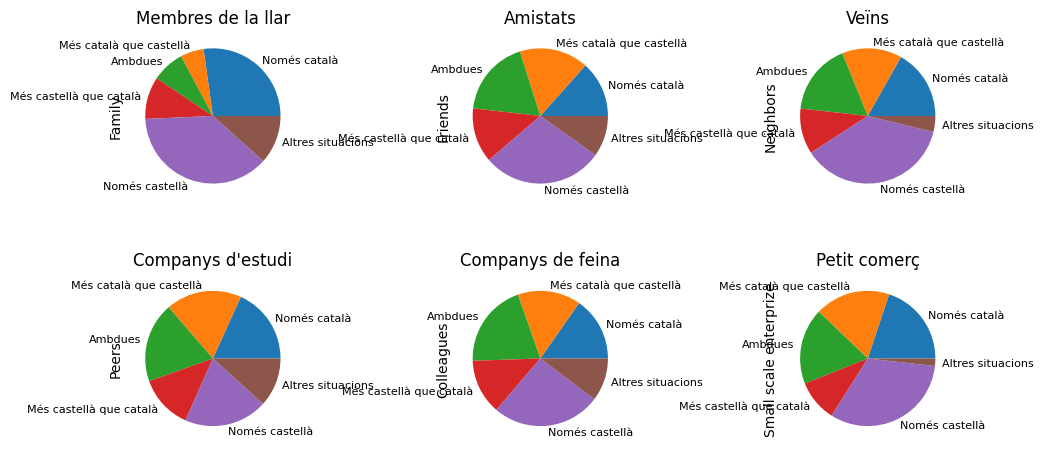

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))  # 3 row, 3 columns


# Plot each bar chart on a different subplot
df2018.iloc[0].plot(kind='pie', ax=axes[0,0], title='Membres de la llar',fontsize=8)
df2018.iloc[1].plot(kind='pie', ax=axes[0,1], title='Amistats',fontsize=8)
df2018.iloc[2].plot(kind='pie', ax=axes[0,2], title='Veïns',fontsize=8)
df2018.iloc[3].plot(kind='pie', ax=axes[1,0], title="Companys d'estudi",fontsize=8)
df2018.iloc[4].plot(kind='pie', ax=axes[1,1], title='Companys de feina',fontsize=8)
df2018.iloc[5].plot(kind='pie', ax=axes[1,2], title="Petit comerç",fontsize=8)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap

plt.savefig(figures_dir + "piechart_answers_2018.png",bbox_inches='tight',dpi=600, transparent=False)
plt.show()

This representation allows us to observe the differences of the given answers for **a given year** depending on the social sphere. It's a good way of start noticing clear differences, as the one observed between the family and the friends concerning the "exclusive use of catalan". Also one can watch that the "only spanish" answer almost always dominates against the "only catalan" answer. Good staring, point, but better and more atracting ways to show results have to be found.

Now another variable can be introduced(the time). Let's watch the change in the answers along the years

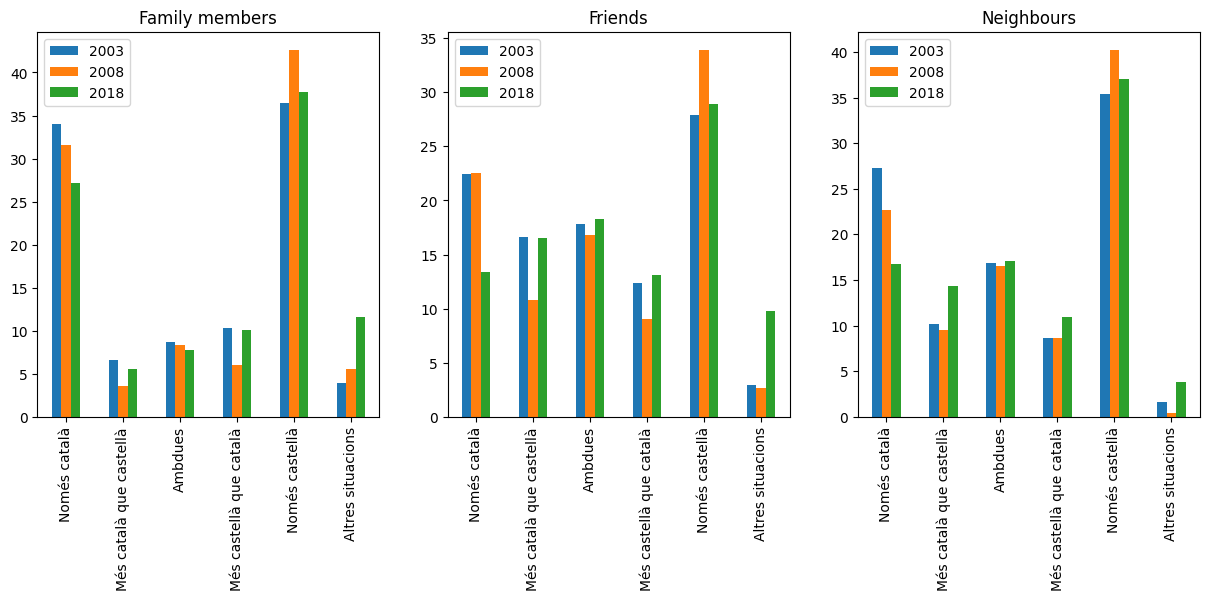

In [78]:
df_family = pd.concat([df2003.iloc[0], df2008.iloc[0],df2018.iloc[0]], axis=1, keys=['2003','2008', '2018']) #Concatenate columns of different df
df_friends = pd.concat([df2003.iloc[1], df2008.iloc[1],df2018.iloc[1]], axis=1, keys=['2003','2008', '2018']) #Concatenate columns of different df
df_neighbors =pd.concat([df2003.iloc[2], df2008.iloc[2],df2018.iloc[2]], axis=1, keys=['2003','2008', '2018'])  #Concatenate columns of different df
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns 

# Create a bar plot to observe tendencies along years 
df_family.plot(kind='bar', ax=axes[0], title='Family members')
df_friends.plot(kind='bar',ax=axes[1], title='Friends')
df_neighbors.plot(kind='bar',ax=axes[2], title='Neighbours')


plt.show()

Again one may notice the general tendency to decrese of the "just catalan" answer. A reversal plot can be made fixing the year at each figure and looking, for a given year, the different answers depending on the social sphere:

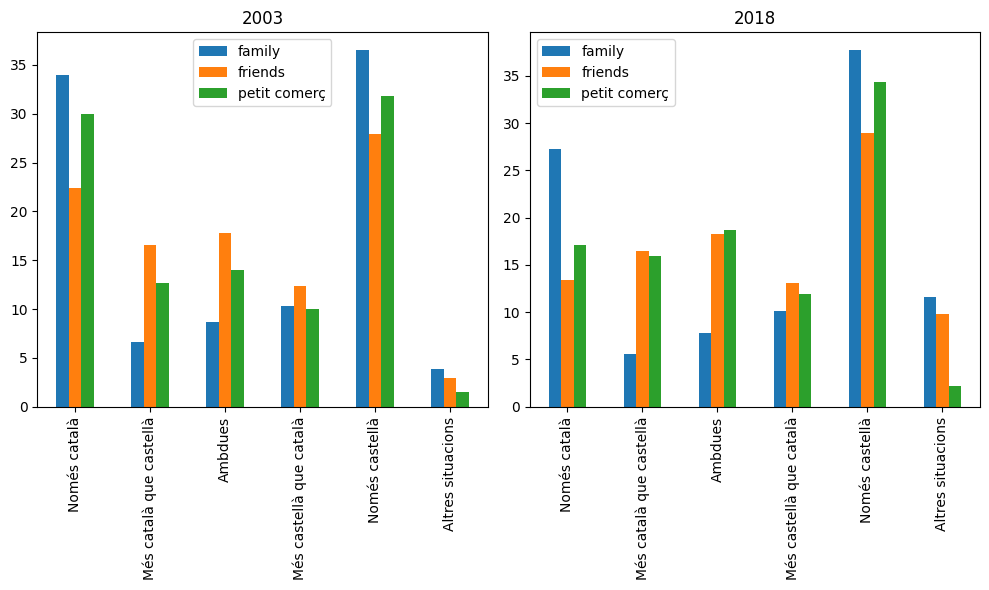

In [79]:
#Concatenate columns for a given year (to avoid representing all the categories)
df_comparison2018 = pd.concat([df2018.iloc[0], df2018.iloc[1],df2018.iloc[6]], axis=1, keys=['family', 'friends','petit comerç']) 
df_comparison2003 = pd.concat([df2003.iloc[0], df2003.iloc[1],df2003.iloc[6]], axis=1, keys=['family', 'friends','petit comerç'])

fig, axes = plt.subplots(1, 2, figsize=(5, 5))  # 1 row, 3 columns

df_comparison2003.plot(kind='bar', ax=axes[0], figsize=(10, 6),title="2003")
df_comparison2018.plot(kind='bar', ax=axes[1], figsize=(10, 6),title="2018")

plt.tight_layout()  # Adjust layout to prevent overlap

plt.savefig(figures_dir + "barchart_evolution_answers.png",bbox_inches='tight',dpi=600, transparent=False)

plt.show()


An alternative for this last figure, in order to include all the social spheres without collapsing the figure, is to use a stacked bar plot. This may be the best representation if one wants to look at concrete differences of the answers between the social spheres.

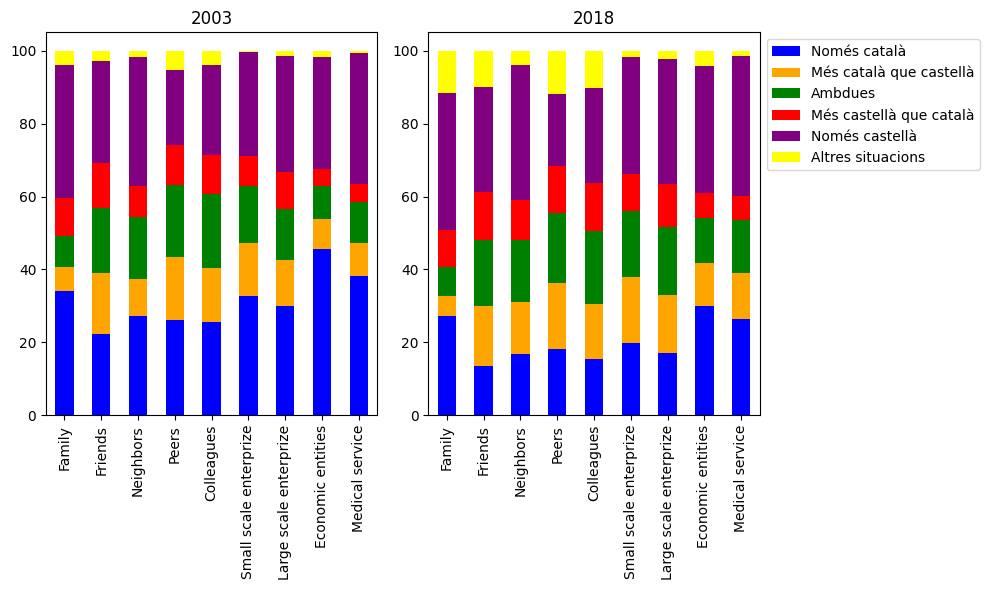

In [80]:
colors = ['blue', 'orange', 'green','red','purple','yellow']
# Different colors will correspond to the different answers 

fig, axes = plt.subplots(1, 2, figsize=(10, 10))  # 1 row, 2 columns

df2003.plot(kind='bar', ax=axes[0], stacked=True, figsize=(10, 6), color=colors,legend=False,title="2003") #Stacked bar plot
df2018.plot(kind='bar', ax=axes[1], stacked=True, figsize=(10, 6), color=colors,legend=True,title="2018") #Stacked bar plot
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside the plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig(figures_dir + "stackedbarchart_evolution_answers.png",bbox_inches='tight',dpi=600, transparent=False)

plt.show()

It may be challenging to establish consequences for all the answers of the survey. That's why now some columns (answers) will be brought together in order to compare the next behaviour: "mostly talks in catalan" (includes the answers "just catalan" and "more catalan than spanish") and "mostly talks in spanish"  (includes the answers "just spanish" and "more spanish than catalan"). It is necessary therefore to select particular columns of the dataframe and "sum" them. That's what's going to be carried out in the following cells.

In [81]:
#Select a particular range of columns of a df:
df2003.iloc[:, :2]

,Només català,Més català que castellà
Family,34.0,6.6
Friends,22.4,16.6
Neighbors,27.3,10.2
Peers,26.2,17.1
Colleagues,25.6,14.9
Small scale enterprize,32.8,14.5
Large scale enterprize,30.0,12.7
Economic entities,45.7,8.1
Medical service,38.1,9.1


In [82]:
#Define the df "majority of catalan", that accounts for the answers impliying "mostly speaks catalan"
#Concatenate some columns 
df_majority_of_catalan = pd.concat([df2003.iloc[:, :2],df2008.iloc[:, :2],df2013.iloc[:, :2],df2018.iloc[:, :2]],axis=1)
 
df_majority_of_catalan['2003'] = df_majority_of_catalan.iloc[:, 0] + df_majority_of_catalan.iloc[:, 1] # Combine columns 1 and 2
df_majority_of_catalan['2008'] = df_majority_of_catalan.iloc[:, 2] + df_majority_of_catalan.iloc[:, 3] # Combine columns 3 and 4
df_majority_of_catalan['2013'] = df_majority_of_catalan.iloc[:, 4] + df_majority_of_catalan.iloc[:, 5] # Combine columns 5 and 6
df_majority_of_catalan['2018'] = df_majority_of_catalan.iloc[:, 6] + df_majority_of_catalan.iloc[:, 7] # Combine columns 7 and 8


# Drop the original columns if desired (optional)
df_majority_of_catalan = df_majority_of_catalan[['2003','2008','2013','2018']]


In [83]:
#Do exactly the same for the spanish language
df_majority_of_spanish = pd.concat([df2003.iloc[:, 3:5],df2008.iloc[:, 3:5],df2013.iloc[:, 3:5],df2018.iloc[:, 3:5]],axis=1)
 
df_majority_of_spanish['2003'] = df_majority_of_spanish.iloc[:, 0] + df_majority_of_spanish.iloc[:, 1] # Combine columns 1 and 2
df_majority_of_spanish['2008'] = df_majority_of_spanish.iloc[:, 2] + df_majority_of_spanish.iloc[:, 3] # Combine columns 3 and 4
df_majority_of_spanish['2013'] = df_majority_of_spanish.iloc[:, 4] + df_majority_of_spanish.iloc[:, 5] # Combine columns 5 and 6
df_majority_of_spanish['2018'] = df_majority_of_spanish.iloc[:, 6] + df_majority_of_spanish.iloc[:, 7] # Combine columns 7 and 8

# Drop the original columns if desired (optional)
df_majority_of_spanish = df_majority_of_spanish[['2003','2008','2013','2018']]


In [84]:
#Look at the new df (info grouped by years)
df_majority_of_catalan

,2003,2008,2013,2018
Family,40.6,35.2,31.9,32.8
Friends,39.0,33.3,30.9,29.9
Neighbors,37.5,32.2,31.9,31.1
Peers,43.3,48.7,42.9,36.3
Colleagues,40.5,33.6,33.0,30.4
Small scale enterprize,47.3,39.7,39.1,37.9
Large scale enterprize,42.7,33.8,33.6,33.0
Economic entities,53.8,44.9,42.3,41.7
Medical service,47.2,41.6,40.3,39.0


Now the same figures as before can be potted, but just distinguishing this two categories.

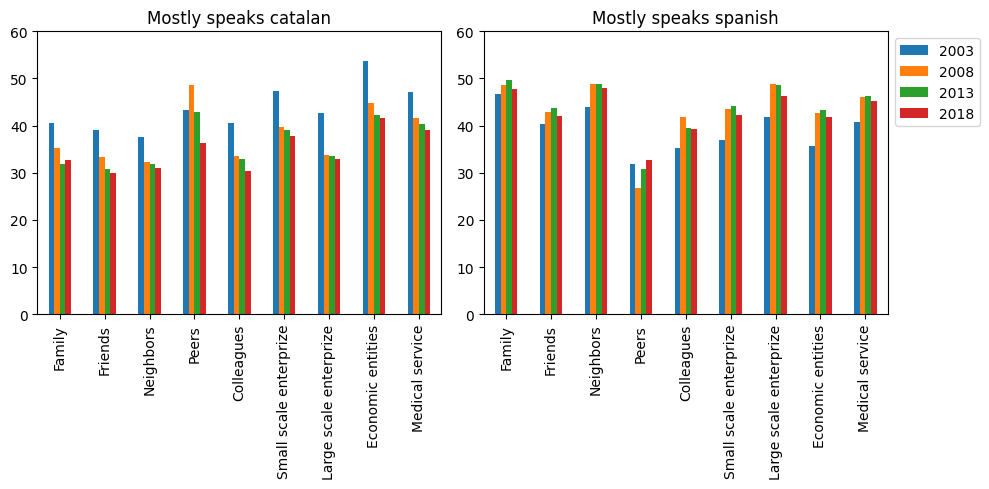

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

df_majority_of_catalan.plot(kind='bar',ax=axes[0],legend=False, title= "Mostly speaks catalan")
df_majority_of_spanish.plot(kind='bar',ax=axes[1],legend=True, title="Mostly speaks spanish")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside the plot
axes[0].set_ylim(0, 60)
axes[1].set_ylim(0, 60)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig(figures_dir + "barchart_catalan_vs_spanish.png",bbox_inches='tight',dpi=600, transparent=False)

plt.show()

This is already a great plot to determine that the majority use of catalan is decreasing along years for absolutely all the categories/social spheres, whereas the majority use of spanish is slighly increasing, or at least being mantained. In order to represent this general tendency for both languages, **but in a more attracting way**), the next cell plots the same info but with a heat map.

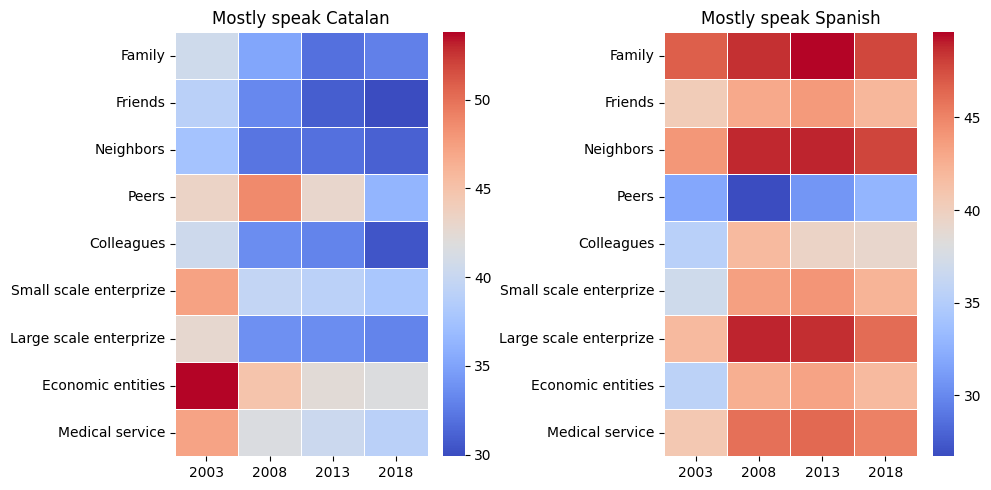

In [74]:
import seaborn as sns #import seaborn
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sns.heatmap(df_majority_of_catalan, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title("Mostly speak Catalan")
sns.heatmap(df_majority_of_spanish, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title("Mostly speak Spanish")

plt.tight_layout()  # Adjust layout to prevent overlap



Need to establish exactly the same color scale to do a fair comparision

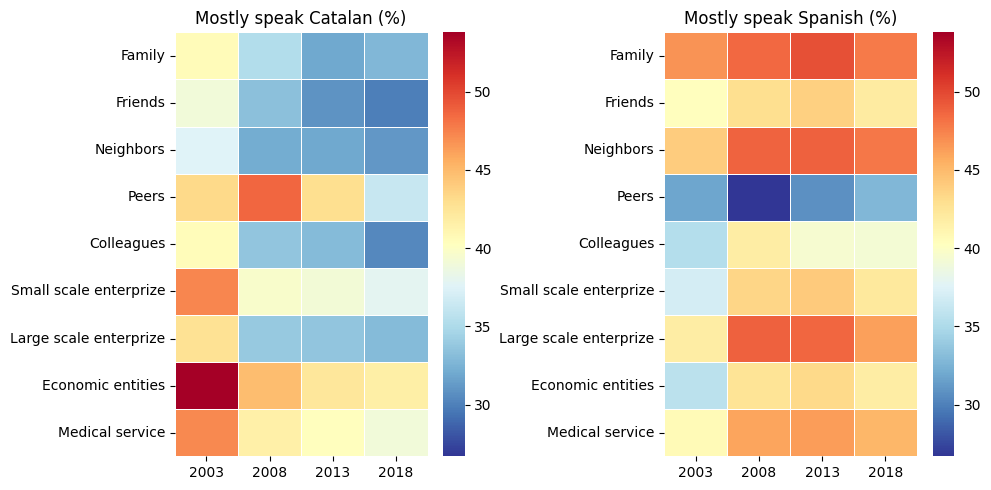

In [86]:
import seaborn as sns
import numpy as np

# Find the global minimum and maximum values across both datasets
global_min = min(df_majority_of_catalan.min().min(), df_majority_of_spanish.min().min())
global_max = max(df_majority_of_catalan.max().max(), df_majority_of_spanish.max().max())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot the heatmaps with shared color scale
sns.heatmap(df_majority_of_catalan, annot=False, cmap='RdYlBu_r', fmt='.2f', 
            linewidths=0.5, ax=axes[0], vmin=global_min, vmax=global_max)
axes[0].set_title("Mostly speak Catalan (%)")

sns.heatmap(df_majority_of_spanish, annot=False, cmap='RdYlBu_r', fmt='.2f', 
            linewidths=0.5, ax=axes[1], vmin=global_min, vmax=global_max)
axes[1].set_title("Mostly speak Spanish (%)")

# Adjust layout
plt.tight_layout()

plt.savefig("C:/Users/giovanni/Desktop/Anàlisi i Visualització de Dades Massives/yearevolutionperambit.png",bbox_inches="tight", dpi=600, transparent = False)
plt.savefig(figures_dir + "heatmap_catalan_vs_spanish.png",bbox_inches='tight',dpi=600, transparent=False)

plt.show()


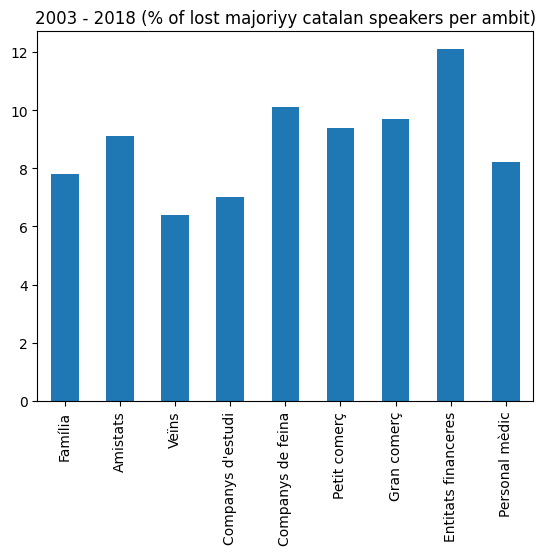

In [403]:
# Alternative (such less attracting ) representation
relative_difference = df_majority_of_catalan['2003'] - df_majority_of_catalan['2018']
relative_difference.plot(kind='bar')
plt.title('2003 - 2018 (% of lost majority catalan speakers per ambit)')
plt.show()

In [336]:
# List of social spheres
ambits = ['Família',
'Amistats',
'Veïns',
"Companys d'estudi",
'Companys de feina',
'Petit comerç',
'Gran comerç',
'Entitats financeres',
'Personal mèdic']

An alternative representation is a heatmap that reproduces the relative differences between social spheres at the extreme years (2003 and 2018). At the diagonal one may recognize the same decreasing pattern that the one  in the last figures. To do this plot we need to obtain a matrix via the df_majority_of_catalan that accounts for relative differences between social spheres in years 2003 and 2018:


In [405]:
#Obtain a matrix via the df_majority_of_catalan df
matrix = {}
for i in ambits:
    fila = []
    for j in ambits:
        element = df_majority_of_catalan.loc[i,'2018'] - df_majority_of_catalan.loc[j,'2003'] 
        fila.append(element)
        matrix[i] = fila
        
data_catalan = pd.DataFrame(matrix,index=ambits)

In [406]:
data_catalan

,Família,Amistats,Veïns,Companys d'estudi,Companys de feina,Petit comerç,Gran comerç,Entitats financeres,Personal mèdic
Família,-7.8,-10.7,-9.5,-4.3,-10.2,-2.7,-7.6,1.1,-1.6
Amistats,-6.2,-9.1,-7.9,-2.7,-8.6,-1.1,-6.0,2.7,0.0
Veïns,-4.7,-7.6,-6.4,-1.2,-7.1,0.4,-4.5,4.2,1.5
Companys d'estudi,-10.5,-13.4,-12.2,-7.0,-12.9,-5.4,-10.3,-1.6,-4.3
Companys de feina,-7.7,-10.6,-9.4,-4.2,-10.1,-2.6,-7.5,1.2,-1.5
Petit comerç,-14.5,-17.4,-16.2,-11.0,-16.9,-9.4,-14.3,-5.6,-8.3
Gran comerç,-9.9,-12.8,-11.6,-6.4,-12.3,-4.8,-9.7,-1.0,-3.7
Entitats financeres,-21.0,-23.9,-22.7,-17.5,-23.4,-15.9,-20.8,-12.1,-14.8
Personal mèdic,-14.4,-17.3,-16.1,-10.9,-16.8,-9.3,-14.2,-5.5,-8.2


#### First verion of the heatmap, taking just the difference 2018 - 2003.

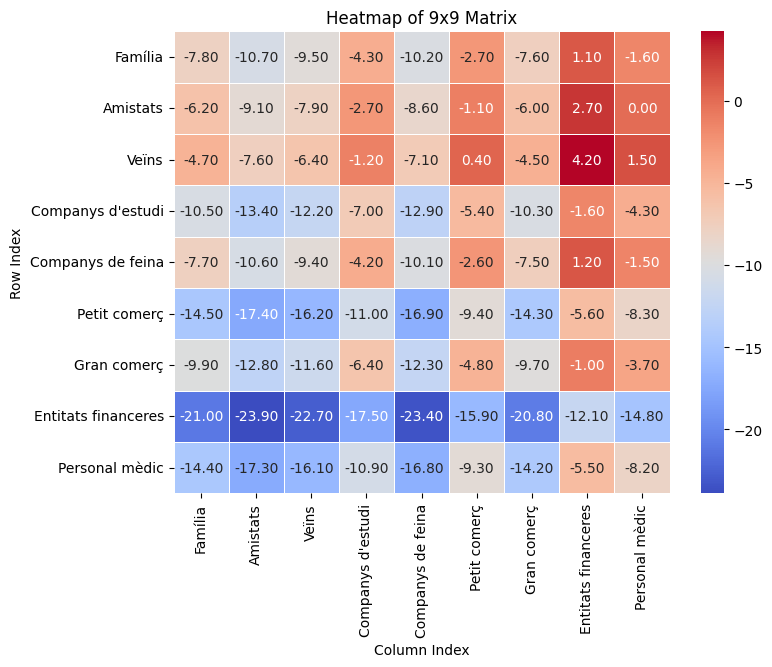

In [407]:
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the size of the heatmap
sns.heatmap(data_catalan, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title("Heatmap of 9x9 Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Display the heatmap
plt.show()

### Second verion of the heatmap, taking the relative difference (2018 - 2003)/2003 in the diagonal and the upper diagonal and (2003-2018)/2018 in the lower diagonal

In [87]:
values_2003 = df_majority_of_catalan["2003"].values
values_2018 = df_majority_of_catalan["2018"].values
# Number of categories
num_categories = len(df_majority_of_catalan)

# Create an empty matrix
matrix = np.zeros((num_categories, num_categories))

# Fill the matrix
for i in range(num_categories):
    for j in range(num_categories):
        if i <= j:
            # Upper diagonal (including diagonal)
            matrix[i, j] = (values_2018[i] - values_2003[j]) /  values_2003[j]
        else:
            # Lower diagonal
            matrix[i, j] = (values_2003[i] - values_2018[j]) /  values_2018[j]

# Convert to a DataFrame for better readability
data_catalan2 = pd.DataFrame(matrix, index=df_majority_of_catalan.index, columns=df_majority_of_catalan.index)



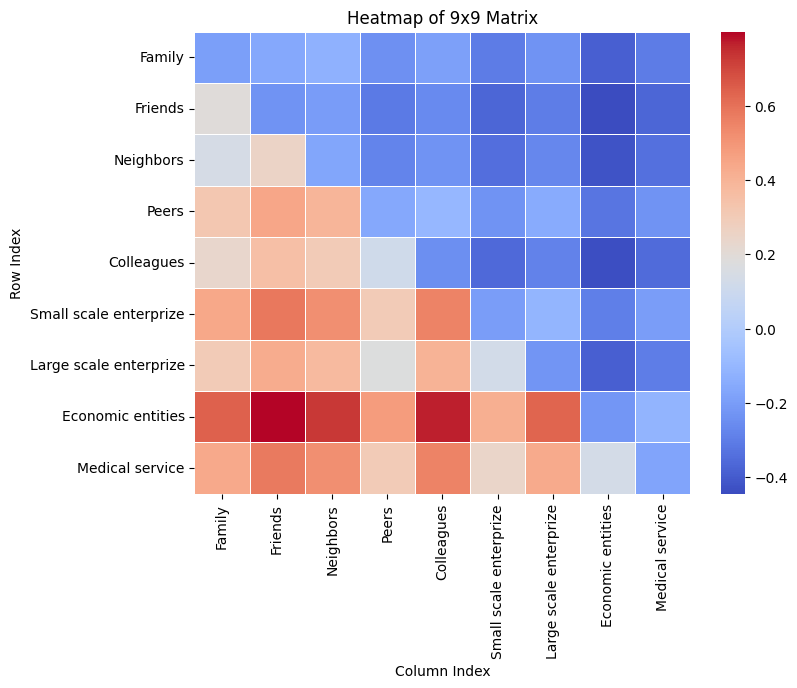

In [88]:
plt.figure(figsize=(8, 6))  # Adjust the size of the heatmap
sns.heatmap(data_catalan2, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title("Heatmap of 9x9 Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Display the heatmap
plt.show()

Now I want to focus for instance in a particular catgeory, say "Friends". For this category I would like to analize how has the tendency of the answers changed over the 4 different years for which I have the data. In other words, want to observe the flow/ evolution of the answers... To do so, first I need to localize the different rows for each dataframe in order to define a new matrix to finally represent the Sankey diagram.

In [90]:
df_amistats = pd.concat([
    df2003.loc[['Friends']].assign(Year=2003),
    df2008.loc[['Friends']].assign(Year=2008),
    df2013.loc[['Friends']].assign(Year=2013),
    df2018.loc[['Friends']].assign(Year=2018)
])


print(df_amistats)

         Només català  Més català que castellà  Ambdues  \
Friends          22.4                     16.6     17.8   
Friends          22.5                     10.8     16.8   
Friends          15.0                     15.9     15.7   
Friends          13.4                     16.5     18.3   

         Més castellà que català  Només castellà  Altres situacions  Year  
Friends                     12.4            27.9                2.9  2003  
Friends                      9.0            33.9                2.7  2008  
Friends                     13.1            30.7                1.7  2013  
Friends                     13.1            28.9                9.8  2018  


Let's try to do for a given year a Sankey ciruclar Diagram. The connections are between each answer and each ambit. It may show the same information but in a more dynamic and visual way.

In [91]:
df_majority_of_catalan

,2003,2008,2013,2018
Family,40.6,35.2,31.9,32.8
Friends,39.0,33.3,30.9,29.9
Neighbors,37.5,32.2,31.9,31.1
Peers,43.3,48.7,42.9,36.3
Colleagues,40.5,33.6,33.0,30.4
Small scale enterprize,47.3,39.7,39.1,37.9
Large scale enterprize,42.7,33.8,33.6,33.0
Economic entities,53.8,44.9,42.3,41.7
Medical service,47.2,41.6,40.3,39.0


In [345]:
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Define nodes: categories + answers
categories = ["Família", "Amistats", "Veïns", "Companys d'estudi", "Companys de feina",
              "Petit comerç", "Gran comerç", "Entitats financeres", "Personal mèdic"]
answers = ["Només català", "Més català que castellà", "Ambdues", 
           "Més castellà que català", "Només castellà", "Altres situacions"]

# Combine all nodes into one list
nodes = categories + answers

# Map nodes to indices
node_indices = {node: idx for idx, node in enumerate(nodes)}

data = []
for i in categories:
    ambit = []
    for k in (df2018.loc[i]):
        ambit.append(k)
    data.append(ambit)
data

# Create links
source = []
target = []
value = []

for i, category in enumerate(categories):
    for j, answer in enumerate(answers):
        source.append(node_indices[category])
        target.append(node_indices[answer])
        value.append(data[i][j])

# Generate a more distinctive color gradient
# Create a custom colormap (Yellow → Red → Blue → Purple)
colors_list = ["blue","green","yellow", "red",]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list)

# Normalize the values for the colormap
norm = mcolors.Normalize(vmin=min(value), vmax=max(value))

# Map the values to the gradient and convert to rgba
colors = [
    f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)"
    for r, g, b, _ in custom_cmap(norm(value))
]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # Apply the custom gradient colors
    )
))

fig.update_layout(
    title_text="Sankey Diagram with Distinctive Gradient: Categories and Responses (2018)",
    font_size=10,
    margin=dict(l=20, r=20, t=30, b=20),
)

fig.show()


In [346]:
data = []
for i in categories:
    ambit = []
    for k in (df2003.loc[i]):
        ambit.append(k)
    data.append(ambit)
data

# Create links
source = []
target = []
value = []

for i, category in enumerate(categories):
    for j, answer in enumerate(answers):
        source.append(node_indices[category])
        target.append(node_indices[answer])
        value.append(data[i][j])

# Generate a more distinctive color gradient
# Create a custom colormap (Yellow → Red → Blue → Purple)
colors_list = ["blue","green","yellow", "red",]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list)

# Normalize the values for the colormap
norm = mcolors.Normalize(vmin=min(value), vmax=max(value))

# Map the values to the gradient and convert to rgba
colors = [
    f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)"
    for r, g, b, _ in custom_cmap(norm(value))
]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # Apply the custom gradient colors
    )
))

fig.update_layout(
    title_text="Sankey Diagram with Distinctive Gradient: Categories and Responses (2003)",
    font_size=10,
    margin=dict(l=20, r=20, t=30, b=20),
)

fig.show()


Putting now both graphics with the same color scale in order to compare the tendencies of the answers of the survey in two different years


In [347]:
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Example: Assuming you have dataframes df2018 and df2019
# Find the global min and max across both datasets (df2018 and df2019)
global_min = min(df2003.min().min(), df2018.min().min())
global_max = max(df2003.max().max(), df2018.max().max())

# Function to generate Sankey diagram
def create_sankey(df, year, categories, answers, nodes):
    data = []
    for i in categories:
        ambit = []
        for k in df.loc[i]:
            ambit.append(k)
        data.append(ambit)

    # Create links
    source = []
    target = []
    value = []

    for i, category in enumerate(categories):
        for j, answer in enumerate(answers):
            source.append(node_indices[category])
            target.append(node_indices[answer])
            value.append(data[i][j])

    # Generate a more distinctive color gradient (Yellow → Red → Blue → Purple)
    colors_list = ["blue","green", "red" , "yellow"]
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors_list)

    # Normalize the values for the color map based on the global min and max
    norm = mcolors.Normalize(vmin=global_min, vmax=global_max)

    # Map the values to the gradient and convert to rgba
    colors = [
        f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.7)"
        for r, g, b, _ in custom_cmap(norm(value))
    ]

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        arrangement="snap",
        node=dict(
            pad=12,
            thickness=4,
            line=dict(color="black", width=0.5),
            label=nodes
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=colors  # Apply the custom gradient colors
        )
    ))

    fig.update_layout(
        title_text=f"Sankey Diagram with Distinctive Gradient: Categories and Responses ({year})",
        font_size=10,
        margin=dict(l=20, r=20, t=30, b=20),
    )

    return fig

# Now, create the Sankey diagrams for both years
fig_2003 = create_sankey(df2003, 2003, categories, answers, nodes)
fig_2018 = create_sankey(df2018, 2018, categories, answers, nodes)

# Show the figures for both years
fig_2003.show()
fig_2018.show()


It seems very hard to visualize the data with this Sankey diagram due to the large number of lines that appear. Probably it is not the best option so at this point I discard including this figure in my final plot.

The next analisy I want to carry out id the following: let's compare the behaviours: "uses just one language" vs "uses both languages". let's try if there has been a significant evolution between these concepts along years. To do so, first let's define the df "df_extremes", which will have as the first column a sum of the columns "just catalan" and "just spanish" of the original datafrmames, and as the second column the sum of the categories "more catalan than spanish", "equally both" and "more spanish than catalan":

In [92]:
df_extremes = df2018.copy() #First copy to dont modify the original df. Then manipulate it


In [93]:
def create_df_dualcharacter(dforiginal):
    '''Sums particular selected columns to define new df'''
    
    df_extremes = dforiginal.copy()
    df_extremes['One language'] = df_extremes['Només català'] + df_extremes['Només castellà'] 
    df_extremes['Both languages'] = df_extremes['Més català que castellà'] + df_extremes['Ambdues'] + df_extremes['Més castellà que català'] 
    df_extremes = df_extremes.drop(columns=["Només català", "Només castellà", "Més català que castellà", "Ambdues", "Més castellà que català","Altres situacions"])
    
    return df_extremes

df_extremes2018 = create_df_dualcharacter(df2018)
df_extremes2013 = create_df_dualcharacter(df2013)
df_extremes2008 = create_df_dualcharacter(df2008)
df_extremes2003 = create_df_dualcharacter(df2003)

In [94]:
#Print
df_extremes2018


,One language,Both languages
Family,64.9,23.5
Friends,42.3,47.9
Neighbors,53.8,42.3
Peers,38.1,50.1
Colleagues,41.3,48.5
Small scale enterprize,52.1,46.2
Large scale enterprize,51.4,46.5
Economic entities,64.9,31.0
Medical service,64.8,33.9


Since we are comparing two columns, the first trivial option is to plot a bar diagram comparing both option, of course for each year.

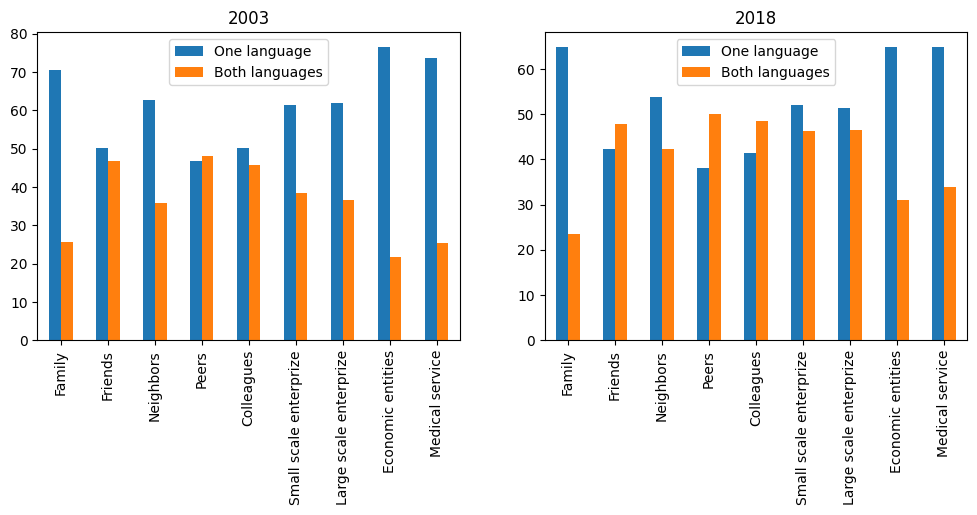

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

df_extremes2003.plot(kind='bar',ax=axes[0],title='2003')
df_extremes2018.plot(kind='bar',ax=axes[1],title='2018')

plt.savefig(figures_dir + "barchart_1vs2languages.png",bbox_inches='tight',dpi=600, transparent=False)

plt.show()

In order to visualize this results in a more attracting way, let's create a polar plot as follows!!

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def create_polar_plot(ax, df, title, max_radius=80):
    """
    Creates a radial (polar) plot on a given axis.

    Parameters:
    - ax (matplotlib axes): The axis where the polar plot will be drawn.
    - df (DataFrame): DataFrame containing the data with categories as index and 
                      two columns for the datasets to compare.
    - title (str): Title of the plot (e.g., year or description).
    - max_radius (int, optional): Maximum value for the radius of the plot. Default is 70.

    Returns:
    - None (displays the plot)
    """
    # Extract categories and data from the DataFrame
    categories = df.index.tolist()
    data1 = df.iloc[:, 0].tolist()  # First column (e.g., One language)
    data2 = df.iloc[:, 1].tolist()  # Second column (e.g., Both languages)

    # Number of categories
    N = len(categories)

    # Angles for the radial plot (evenly spaced)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

    # Close the circular plot by appending the first data point again
    angles += angles[:1]
    data1 += data1[:1]
    data2 += data2[:1]

    # Plot the first dataset
    ax.plot(angles, data1, linewidth=2, color="#377eb8", linestyle='solid', label=df.columns[0])
    ax.fill(angles, data1, alpha=0.3,color="#377eb8")

    # Plot the second dataset
    ax.plot(angles, data2, linewidth=2, color="#ff7f00",linestyle='dashed', label=df.columns[1])
    ax.fill(angles, data2, alpha=0.3,color="#ff7f00")

    # Set the radius limit
    ax.set_ylim(0, max_radius)

    # Add labels for each category
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10, rotation=45)

    #Set the radial ticks
    ax.set_yticks([20, 40, 60, 80])
    
    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

    # Set the title
    ax.set_title(title, va='bottom', fontsize=14)



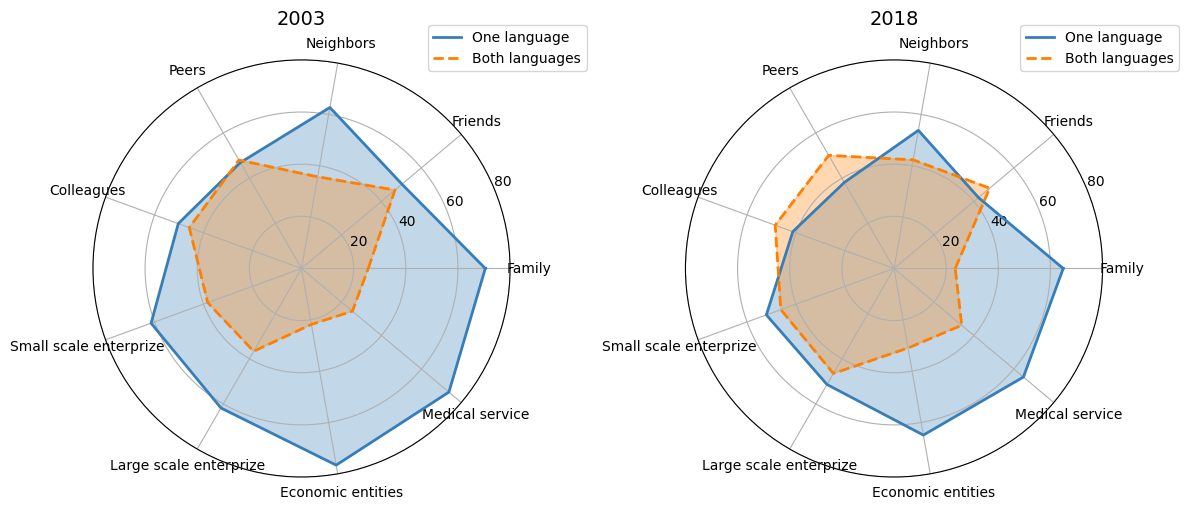

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'polar': True})

# Crear el gráfico para 2003 en el segundo subgráfico
create_polar_plot(axes[0], df_extremes2003, "2003")

# Crear el gráfico para 2018 en el primer subgráfico
create_polar_plot(axes[1], df_extremes2018, "2018")

plt.tight_layout()


plt.savefig("C:/Users/giovanni/Desktop/Anàlisi i Visualització de Dades Massives/One_vs_Two20032018.png",bbox_inches="tight", dpi=600, transparent = False)
plt.savefig(figures_dir + "polarchart_1vs2languages.png",bbox_inches='tight',dpi=600, transparent=False)


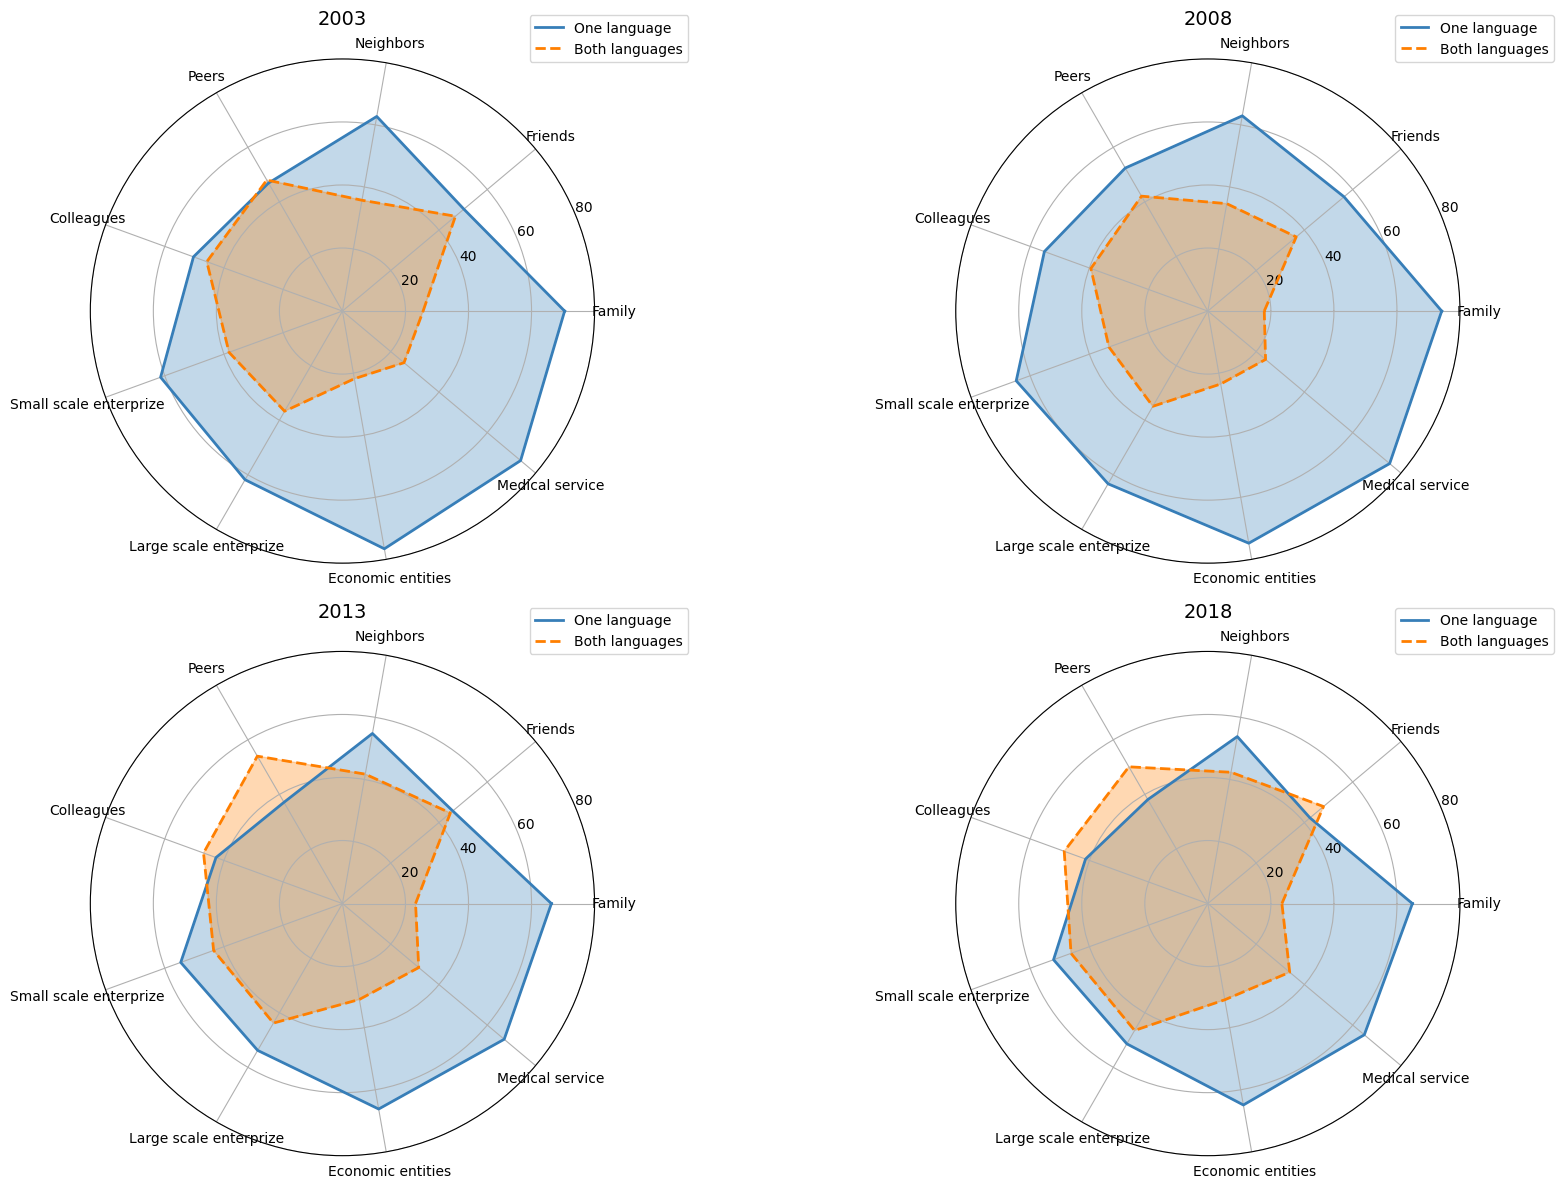

In [100]:
# Crear subgráficos (subplots) en una fila
fig, axes = plt.subplots(2, 2, figsize=(18, 12), subplot_kw={'polar': True})


# Crear el gráfico para 2003 en el segundo subgráfico
create_polar_plot(axes[0,0], df_extremes2003, "2003")

# Crear el gráfico para 2003 en el segundo subgráfico
create_polar_plot(axes[0,1], df_extremes2008, "2008")

# Crear el gráfico para 2003 en el segundo subgráfico
create_polar_plot(axes[1,0], df_extremes2013, "2013")

# Crear el gráfico para 2018 en el primer subgráfico
create_polar_plot(axes[1,1], df_extremes2018, "2018")


# Ajustar el espacio entre los subgráficos
plt.tight_layout()

plt.savefig("C:/Users/giovanni/Desktop/Anàlisi i Visualització de Dades Massives/One_vs_Two.png",bbox_inches="tight", dpi=600, transparent = False)

plt.savefig(figures_dir + "polarchart_1vs2languages4years.png",bbox_inches='tight',dpi=600, transparent=False)

# Mostrar la figur
plt.show()


The last goal is try to produce a figure that purely compares social spheres. Since now:

- The heat map compares social spheres , but focuses most on the evolution of majority use of catalan and spanish along years (figure 1)
- The polar chart establishes the comparision between the tendencies "speaks just one language" vs "speaks both languages" (figure 2)
  
In order to avoid being redundant with figure 1, the year is fixed now (the most recent year is taken, 2018). Also, to add a new component and to do the comparison more visually attractive this will be plotted using maps.

In [459]:
import geopandas as gpd


In [460]:
data_dir = "../LlenguaCatalana/Dades/"
vegueries = gpd.read_file(data_dir + "vegueries.json")

In [461]:
vegueries

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry
0,00,Alt Pirineu i Aran,Vielha,633.059716,"MULTIPOLYGON (((0.71450 42.85981, 0.71354 42.8..."
1,01,Barcelona,Barcelona,2350.158393,"MULTIPOLYGON (((2.17513 41.34935, 2.17530 41.3..."
2,02,Comarques Gironines,Girona,5581.600761,"MULTIPOLYGON (((2.79206 41.66997, 2.79213 41.6..."
3,03,Ponent,Ponent,5424.508094,"MULTIPOLYGON (((1.16760 42.11884, 1.16681 42.1..."
4,04,Camp de Tarragona,Tarragona,2703.327145,"MULTIPOLYGON (((1.03706 41.05770, 1.03707 41.0..."
5,05,Terres de l'Ebre,Tortosa,3306.194831,"MULTIPOLYGON (((0.64478 40.57413, 0.64480 40.5..."
6,06,Alt Pirineu i Aran,*,5142.521823,"MULTIPOLYGON (((1.31969 41.98228, 1.32097 41.9..."
7,07,Comarques Centrals,*,5216.877361,"MULTIPOLYGON (((1.45529 41.64254, 1.45506 41.6..."
8,08,Penedès,*,1746.336894,"MULTIPOLYGON (((1.64362 41.19322, 1.64411 41.1..."


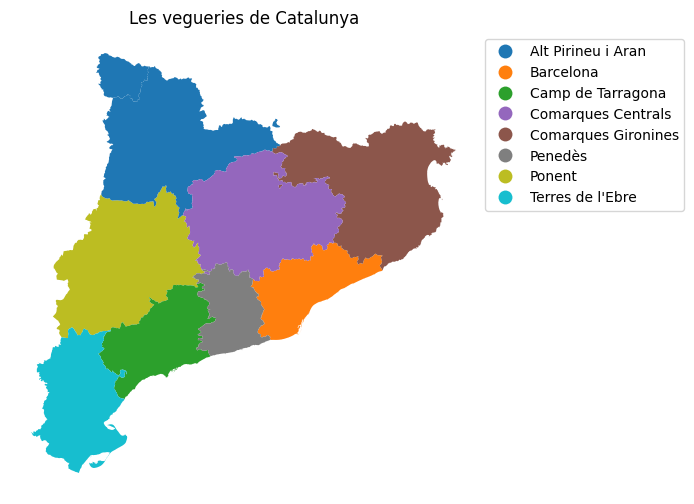

In [462]:
# Plot the data and move the legend
ax = vegueries.plot(
    column='NOMVEGUE',  # Replace with the column used for coloring
    legend=True,           # Add a legend
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1),  # Fine-tune position (outside the plot)
    },
    figsize=(10, 6)         # Size of the plot
)

# Customize and display the plot

plt.title("Les vegueries de Catalunya")
ax.axis('off')

plt.show()

In [463]:
df_vegueries = pd.read_csv('ambits_vegueries_2018.csv',delimiter=";",index_col="Unnamed: 0")

In [464]:
df_vegueries

,Metropolità,Comarques Gironines,Camp de Tarragona,Terres de l'Ebre,Ponent,Comarques Centrals,Alt Pirineu i Aran,Penedès,Total
Membres de la llar (1),"19,7","43,4","30,4","60,9","44,9","48,7","46,6","28,2","27,2"
Amistats,"7,4","27,5","15,1","49,9","27,6","29,1","22,8","12,2","13,4"
Veïns,"9,5",35,16,"55,3","32,5",39,"34,1",16,"16,8"
Companys d'estudi (2),"11,8","37,5","19,2","42,3","32,7",35,30,..,"18,2"
Companys de feina (3),"9,4","30,5",20,"43,3","23,5","33,9","29,1","15,8","15,3"
Usuaris o clients de Catalunya (4),"8,3","18,2","11,4","27,7","20,4","25,8","20,7","7,9","11,3"
Petit comerç,"12,6","37,7","22,1","50,3","36,9","42,9","34,7","18,7","19,9"
Gran comerç,"11,3","30,9","19,4","39,1","31,9",35,"27,2","16,3","17,1"
Entitats financeres,"22,5","48,7","31,7",59,"44,7","55,5","50,7","30,8","30,1"
Administració local,"29,8","57,9","40,5","67,7",53,"62,2",58,"41,5","37,9"


Again, this dataset needs to be cleaned, as follows:

In [465]:
df_vegueries.drop('Total', axis=1, inplace=True)
df_vegueries = df_vegueries.rename(columns={'Metropolità': 'Barcelona'})
df_vegueries = rename_rows(df_vegueries)

In [466]:
nom_cols =  list(df_vegueries.columns)
nom_cols
df_vegueries = clean_dataframe(df_vegueries,nom_cols)

In [467]:
df_vegueries

,Barcelona,Comarques Gironines,Camp de Tarragona,Terres de l'Ebre,Ponent,Comarques Centrals,Alt Pirineu i Aran,Penedès
Família,19.7,43.4,30.4,60.9,44.9,48.7,46.6,28.2
Amistats,7.4,27.5,15.1,49.9,27.6,29.1,22.8,12.2
Veïns,9.5,35.0,16.0,55.3,32.5,39.0,34.1,16.0
Companys d'estudi,11.8,37.5,19.2,42.3,32.7,35.0,30.0,NaN
Companys de feina,9.4,30.5,20.0,43.3,23.5,33.9,29.1,15.8
Usuaris o clients de Catalunya (4),8.3,18.2,11.4,27.7,20.4,25.8,20.7,7.9
Petit comerç,12.6,37.7,22.1,50.3,36.9,42.9,34.7,18.7
Gran comerç,11.3,30.9,19.4,39.1,31.9,35.0,27.2,16.3
Entitats financeres,22.5,48.7,31.7,59.0,44.7,55.5,50.7,30.8
Administració local,29.8,57.9,40.5,67.7,53.0,62.2,58.0,41.5


In [468]:
df_vegueries.loc['Família']

Barcelona              19.7
Comarques Gironines    43.4
Camp de Tarragona      30.4
Terres de l'Ebre       60.9
Ponent                 44.9
Comarques Centrals     48.7
Alt Pirineu i Aran     46.6
Penedès                28.2
Name: Família, dtype: float64

In [494]:
def create_dataframe_mapping(ambit):
    # Selecting an specific row, depenfing on the ambit that is taken as an input
    fila = df_vegueries.loc[ambit]  # Returns a Series with columns as indexs and the values of the selected row.

    # Converts the series to a DF with the original columns as rows
    df_transformed = fila.reset_index()
    df_transformed.columns = ['NOMVEGUE', ambit]  # Renames the columns for better clarity
    return df_transformed


df_familia = create_dataframe_mapping('Família')
df_amistats = create_dataframe_mapping('Amistats')
df_feina = create_dataframe_mapping('Companys de feina')
df_petitcomerç = create_dataframe_mapping("Petit comerç")
df_grancomerç = create_dataframe_mapping('Gran comerç')
df_personalmedic = create_dataframe_mapping('Personal mèdic')

df_estudi

,NOMVEGUE,Companys d'estudi
0,Barcelona,11.8
1,Comarques Gironines,37.5
2,Camp de Tarragona,19.2
3,Terres de l'Ebre,42.3
4,Ponent,32.7
5,Comarques Centrals,35.0
6,Alt Pirineu i Aran,30.0
7,Penedès,NaN


In [495]:
# Do the merge in order to plot the results
merge_familia = vegueries.merge(df_familia,on='NOMVEGUE')
merge_amistats = vegueries.merge(df_amistats,on='NOMVEGUE')
merge_feina = vegueries.merge(df_feina,on='NOMVEGUE')
merge_petitcomerç = vegueries.merge(df_petitcomerç,on='NOMVEGUE')
merge_grancomerç = vegueries.merge(df_grancomerç,on='NOMVEGUE')
merge_personalmedic = vegueries.merge(df_personalmedic,on='NOMVEGUE')



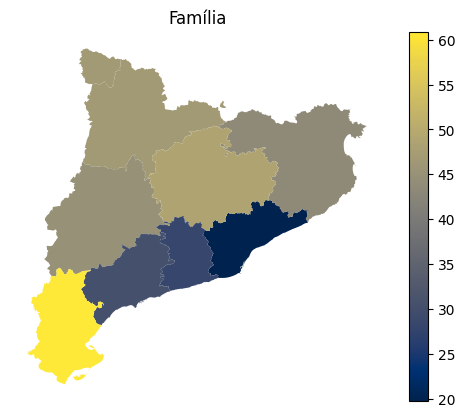

In [472]:
# Plot the data and move the legend
familia_plot = merge_familia.plot(
    column='Família',  # Replace with the column used for coloring
    cmap='cividis',
    legend=True,           # Add a legend
)

# Remove the axis
familia_plot.set_axis_off()

# Customize and display the plot
plt.title("Família")
plt.show()

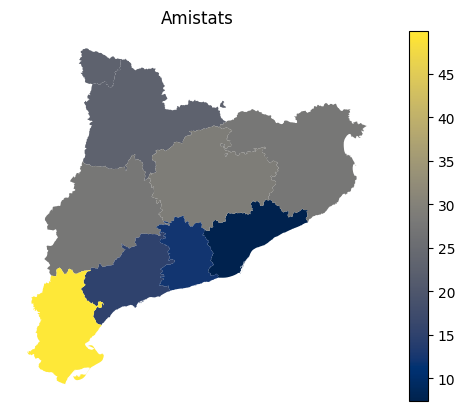

In [473]:
# Plot the data and move the legend
amistats_plot = merge_amistats.plot(
    column='Amistats',  # Replace with the column used for coloring
    cmap='cividis',
    legend=True,           # Add a legend
)

# Remove the axis
amistats_plot.set_axis_off()

# Customize and display the plot
plt.title("Amistats")
plt.show()

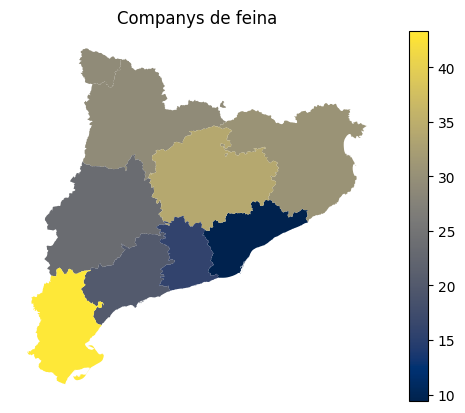

In [474]:
# Plot the data and move the legend
feina_plot = merge_feina.plot(
    column='Companys de feina',  # Replace with the column used for coloring
    cmap='cividis',
    legend=True,           # Add a legend
)

# Remove the axis
feina_plot.set_axis_off()

# Customize and display the plot
plt.title("Companys de feina")
plt.show()

But these figures are useless since the goal is basically to compare the use of catalan in different social spheres. In other words, **we must define a unique scale in order to compare fairly the three maps and detect differences between them**. The next step is therefore to define a general scale by taking the maximum and minimum values of all sets. Later we will determine if the result carrying on this action is satisfactory. Also, we should put the three maps together in a row, doing subplots.


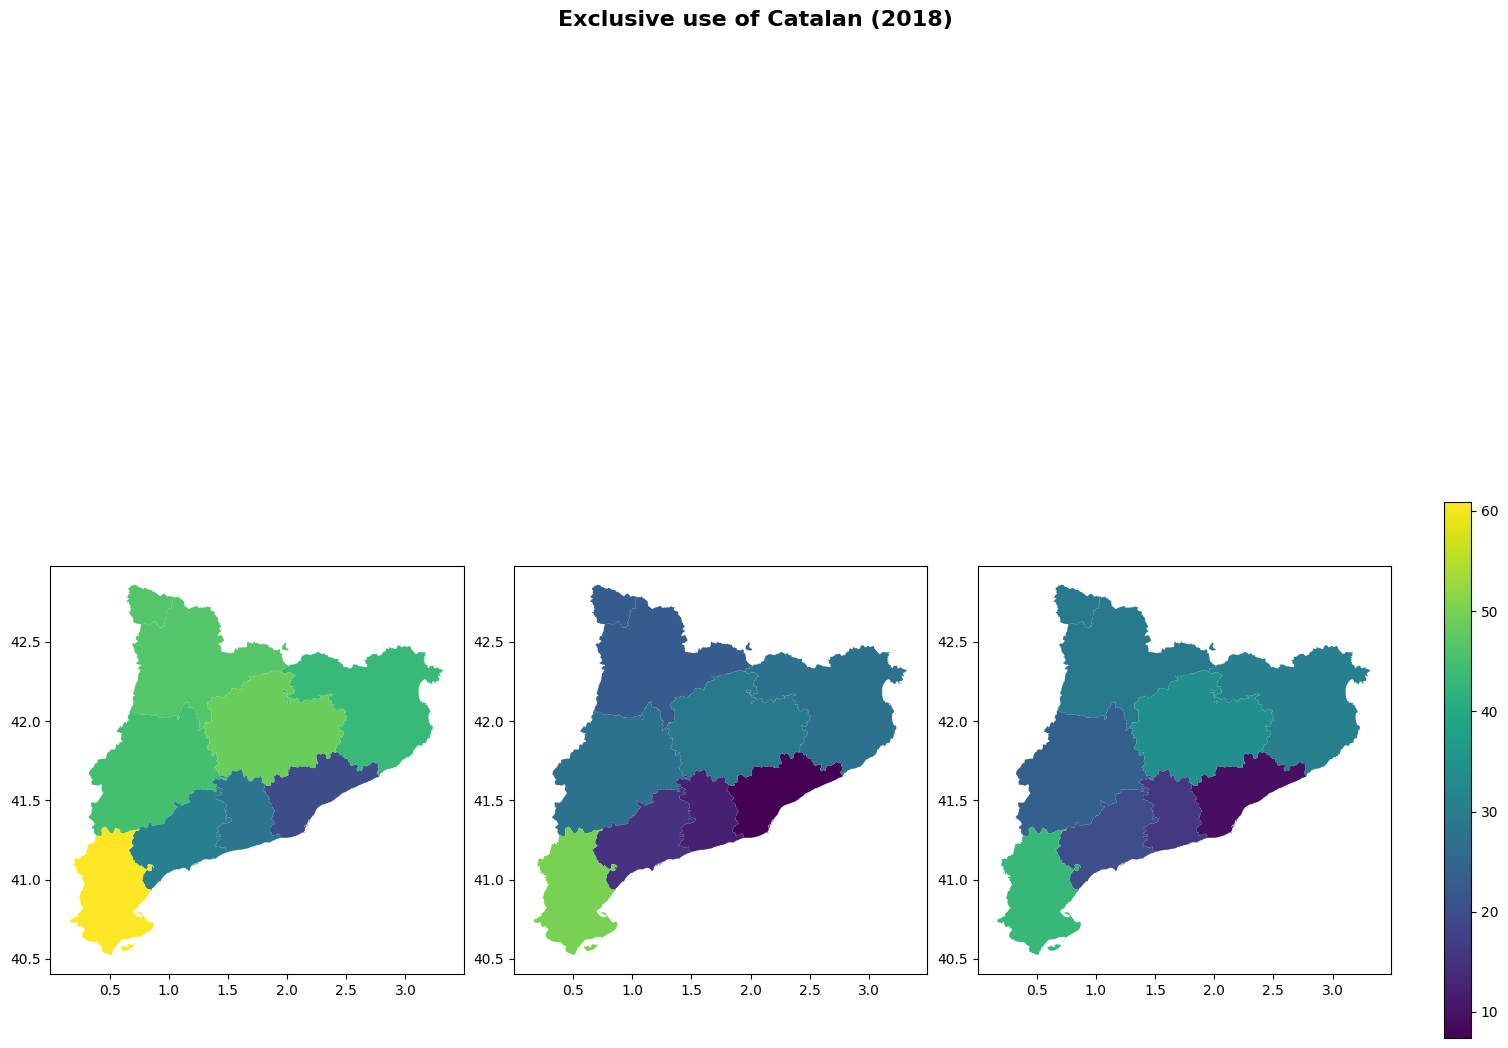

In [485]:
# Define the global min and max values across all columns for the color scale
vmin = min(
    merge_familia['Família'].min(), 
    merge_amistats['Amistats'].min(), 
    merge_feina['Companys de feina'].min()
)
vmax = max(
    merge_familia['Família'].max(), 
    merge_amistats['Amistats'].max(), 
    merge_feina['Companys de feina'].max()
)

# Enable constrained_layout to handle spacing automatically
fig, axes = plt.subplots(1, 3, figsize=(15, 15), constrained_layout=True)

# Plot on each axis without legend (to avoid duplication of legends)
merge_familia.plot(
    column='Família',  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[0],  # Plot on the first subplot (left)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
merge_amistats.plot(
    column='Amistats',  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[1],  # Plot on the second subplot (middle)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
merge_feina.plot(
    column='Companys de feina',  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[2],  # Plot on the third subplot (right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)

# Create a shared color legend using the first plot (or any plot)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # Required to make the ScalarMappable work

# Add colorbar (shared legend) on the side of the plot
fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# Set the main title for the figure
fig.suptitle("Exclusive use of Catalan (2018)", fontsize=16, fontweight='bold')

plt.show()


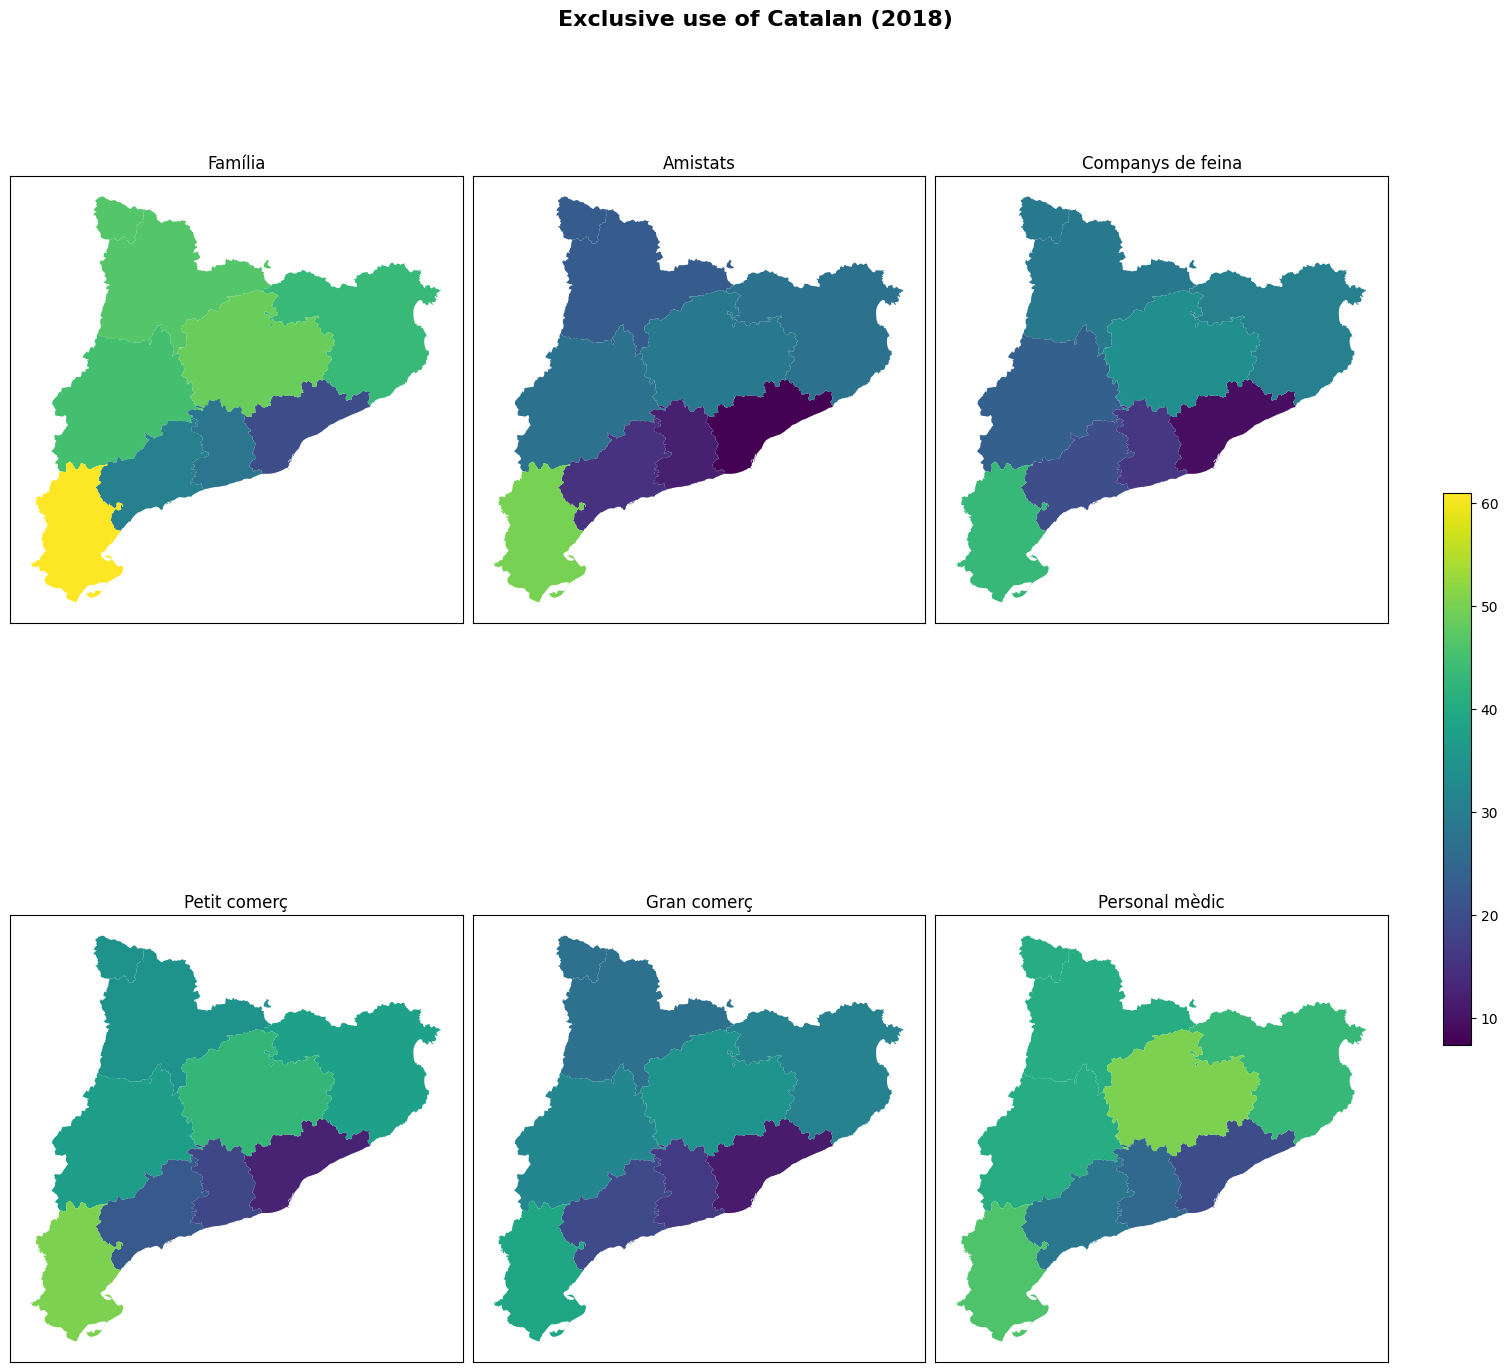

In [514]:
# Define the global min and max values across all columns for the color scale
vmin = min(
    merge_familia['Família'].min(), 
    merge_amistats['Amistats'].min(), 
    merge_feina['Companys de feina'].min(),
    merge_petitcomerç["Petit comerç"].min(),
    merge_grancomerç["Gran comerç"].min(),
    merge_personalmedic["Personal mèdic"].min(),
)

vmax = max(
    merge_familia['Família'].max(), 
    merge_amistats['Amistats'].max(), 
    merge_feina['Companys de feina'].max(),
    merge_petitcomerç["Petit comerç"].max(),
    merge_grancomerç["Gran comerç"].max(),
    merge_personalmedic["Personal mèdic"].max(),
)

# Enable constrained_layout to handle spacing automatically
fig, axes = plt.subplots(2, 3, figsize=(15, 15), constrained_layout=True)


    
# Plot on each axis without legend (to avoid duplication of legends)
merge_familia.plot(
    column='Família',  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[0,0],  # Plot on the first subplot (left)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
axes[0,0].set_title('Família')  # Set the title of the first subplot

merge_amistats.plot(
    column='Amistats',  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[0,1],  # Plot on the second subplot (middle)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
axes[0,1].set_title('Amistats')  # Set the title of the second subplot

merge_feina.plot(
    column='Companys de feina',  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[0,2],  # Plot on the third subplot (right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
axes[0,2].set_title('Companys de feina')  # Set the title of the third subplot


merge_petitcomerç.plot(
    column="Petit comerç",  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[1,0],  # Plot on the third subplot (right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
axes[1,0].set_title("Petit comerç")  # Set the title of the third subplot


merge_grancomerç.plot(
    column="Gran comerç",  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[1,1],  # Plot on the third subplot (right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
axes[1,1].set_title("Gran comerç")  # Set the title of the third subplot


merge_personalmedic.plot(
    column="Personal mèdic",  # Replace with the column you want to color by
    cmap='viridis',
    ax=axes[1,2],  # Plot on the third subplot (right)
    legend=False,  # Don't show legend here
    vmin=vmin,  # Set the same vmin for all plots
    vmax=vmax   # Set the same vmax for all plots
)
axes[1,2].set_title("Personal mèdic")  # Set the title of the third subplot

# Remove x and y ticks for all subplots
for ax in axes.ravel():  # Use ravel() to handle axes as a flat array
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

# Create a shared color legend using the first plot (or any plot)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])  # Required to make the ScalarMappable work

# Add colorbar (shared legend) on the side of the plot
fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# Set the main title for the figure
fig.suptitle("Exclusive use of Catalan (2018)", fontsize=16, fontweight='bold')


plt.savefig("C:/Users/giovanni/Desktop/Anàlisi i Visualització de Dades Massives/mapes.pdf",format="pdf")
plt.show()
